In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])

In [3]:
# Preprocessing function
def preprocess_data(data, features):
    # Extract features
    X = data[features]
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [4]:
# Train the DBSCAN model
def train_dbscan(X_train, eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X_train)
    return model

In [5]:
# Visualize the clusters
def visualize_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

In [6]:
# Evaluate the clustering
def evaluate_clustering(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

In [8]:
# Features to be used
features = ['sepal length (cm)', 'sepal width (cm)']

In [9]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(data[features], test_size=0.2, random_state=42)

In [10]:
# Preprocess the training and testing data
X_train_scaled = preprocess_data(X_train, features)
X_test_scaled = preprocess_data(X_test, features)

In [11]:
# Train the DBSCAN model
eps = 0.5
min_samples = 5
dbscan_model = train_dbscan(X_train_scaled, eps, min_samples)

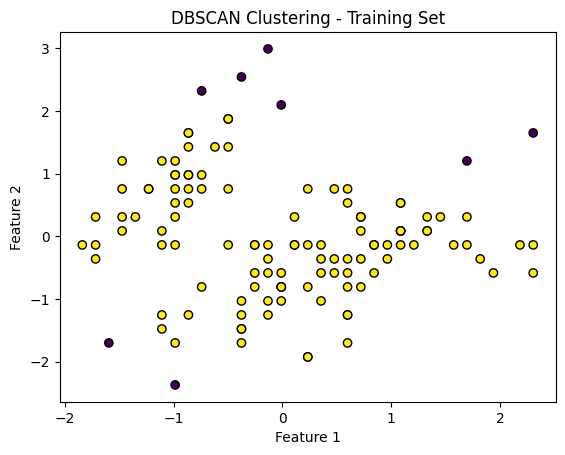

In [12]:
# Visualize clusters on the training set
visualize_clusters(X_train_scaled, dbscan_model.labels_, 'DBSCAN Clustering - Training Set')

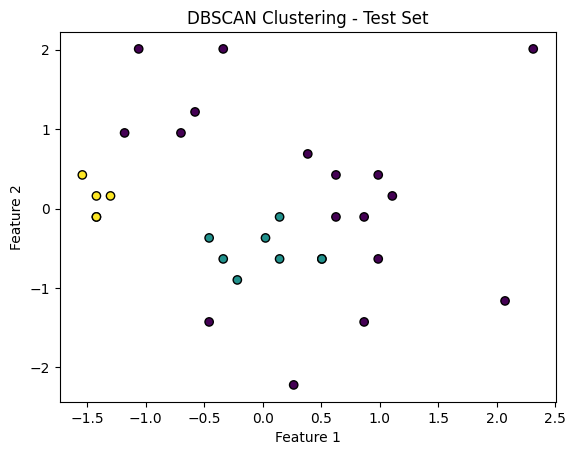

In [13]:
# Visualize clusters on the test set
test_labels = dbscan_model.fit_predict(X_test_scaled)
visualize_clusters(X_test_scaled, test_labels, 'DBSCAN Clustering - Test Set')

In [15]:
# Evaluate clustering on the test set
silhouette_avg_test = evaluate_clustering(X_test_scaled, test_labels)
print(f'Silhouette Score (Test Set): {silhouette_avg_test}')

Silhouette Score (Test Set): 0.13369688450435838
